In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [160]:
df_jc = pd.read_csv('aug_train.csv')

In [161]:
df_jc.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [162]:
df_jc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [163]:
df_jc.shape

(19158, 14)

In [164]:
df_jc=df_jc.set_index('enrollee_id')

In [165]:
df_jc=df_jc.drop(['city_development_index','company_size'],1)

In [166]:
df_jc.isnull().sum()

city                      0
gender                 4508
relevent_experience       0
enrolled_university     386
education_level         460
major_discipline       2813
experience               65
company_type           6140
last_new_job            423
training_hours            0
target                    0
dtype: int64

In [167]:
df_jc['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [168]:
df_jc['gender']=df_jc['gender'].fillna(df_jc['gender'].mode()[0])

In [169]:
tab=df_jc['experience'].value_counts(normalize=True)
df_jc['experience']=df_jc['experience'].map(tab)

In [170]:
df_jc['experience']=df_jc['experience'].fillna(df_jc['experience'].mode()[0])

In [171]:
df_jc['company_type']=df_jc['company_type'].fillna(df_jc['company_type'].mode()[0])

In [172]:
df_jc['experience']=df_jc['experience'].fillna(df_jc['experience'].mode()[0])

In [173]:
df_jc['education_level']=df_jc['education_level'].fillna(df_jc['education_level'].mode()[0])

In [174]:
df_jc['last_new_job']=df_jc['last_new_job'].fillna(df_jc['last_new_job'].mode()[0])

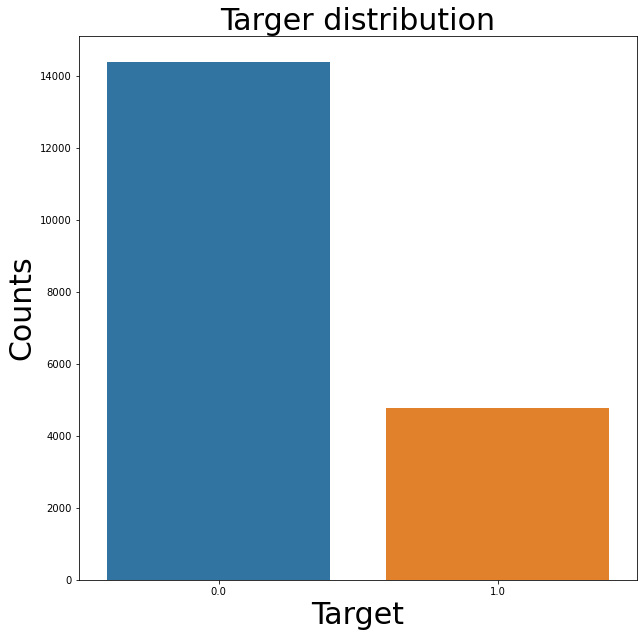

In [175]:
plt.figure(figsize=(10,10))
sns.countplot(df_jc['target'])
plt.title('Targer distribution',fontsize=30)
plt.xlabel('Target',fontsize=30)
plt.ylabel('Counts',fontsize=30)
plt.show()

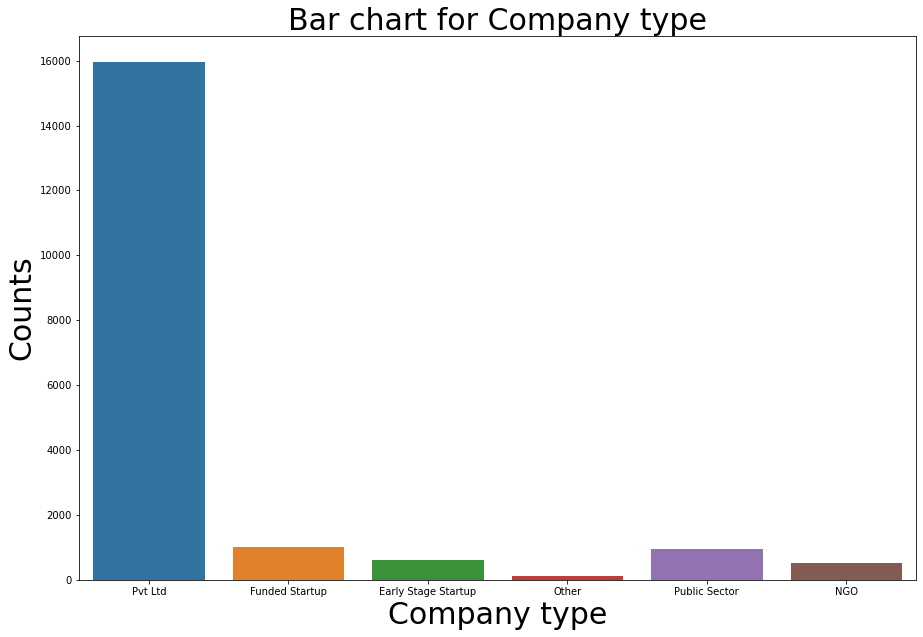

In [176]:
plt.figure(figsize=(15,10))
sns.countplot(df_jc['company_type'])
plt.title('Bar chart for Company type',fontsize=30)
plt.xlabel('Company type',fontsize=30)
plt.ylabel('Counts',fontsize=30)
plt.show()

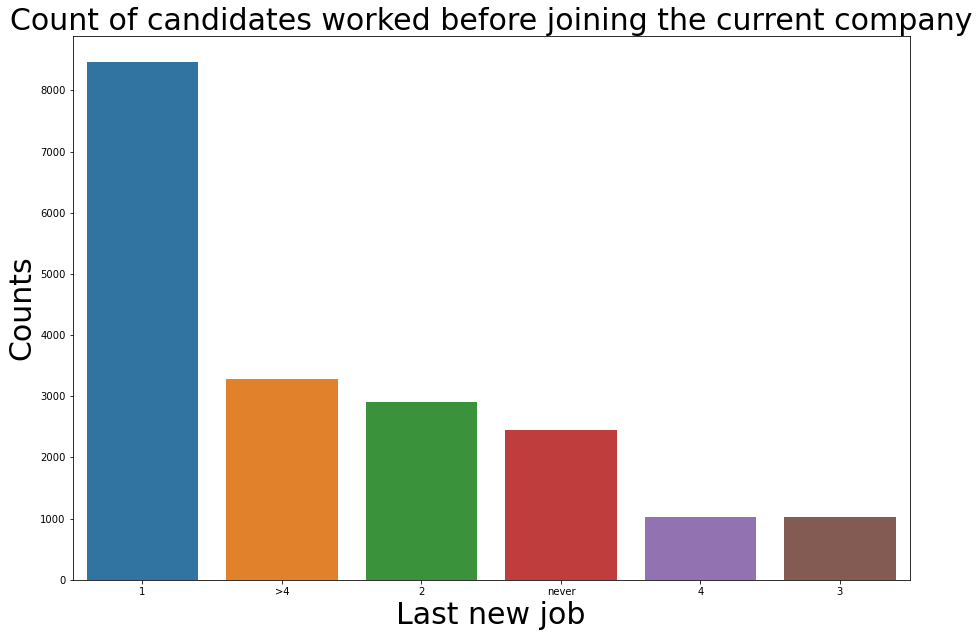

In [177]:
plt.figure(figsize=(15,10))
sns.countplot(df_jc['last_new_job'],order=df_jc['last_new_job'].value_counts().index)
plt.title('Count of candidates worked before joining the current company',fontsize=30)
plt.xlabel('Last new job',fontsize=30)
plt.ylabel('Counts',fontsize=30)
plt.show()

In [178]:
df_jc['gender'].value_counts()

Male      17729
Female     1238
Other       191
Name: gender, dtype: int64

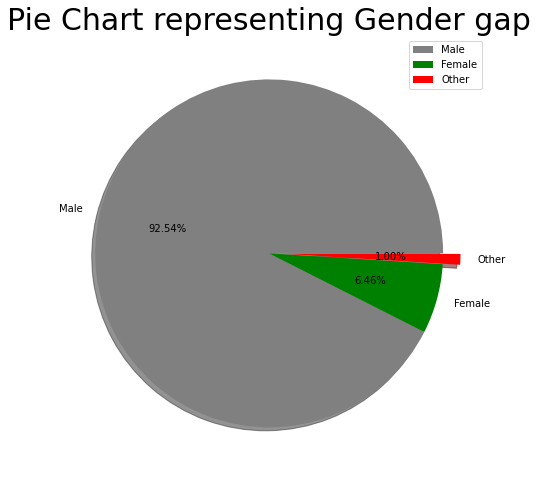

In [179]:
size = [17729, 1238,191]
labels = 'Male','Female','Other'
colors = ['grey', 'green','red']
explode = [0,0,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Pie Chart representing Gender gap', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

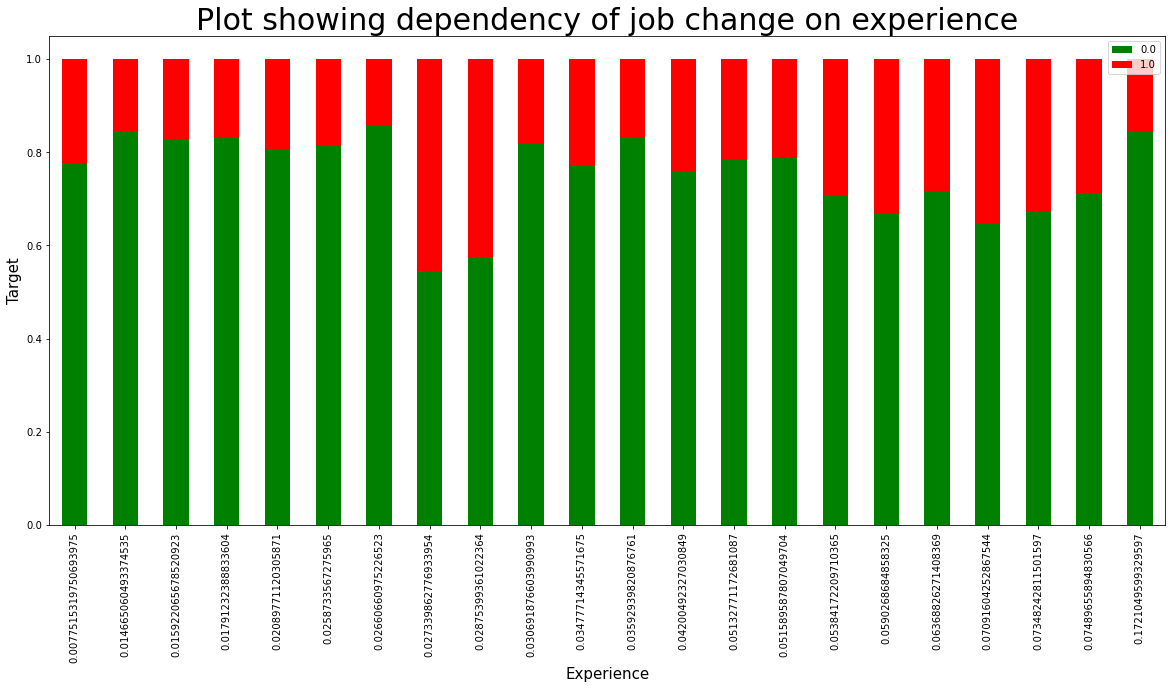

In [180]:
tab = pd.crosstab(df_jc['experience'], df_jc['target'])
tab.div(tab.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['green', 'red'])

plt.title('Plot showing dependency of job change on experience', fontsize = 30)
plt.xlabel('Experience', fontsize = 15)
plt.ylabel('Target',fontsize=15)
plt.legend()
plt.show()

### The plot conveys that candidates with 1 year experience or lesser than 1 year experience are majorly looking for a job change than an higher experienced candidates.

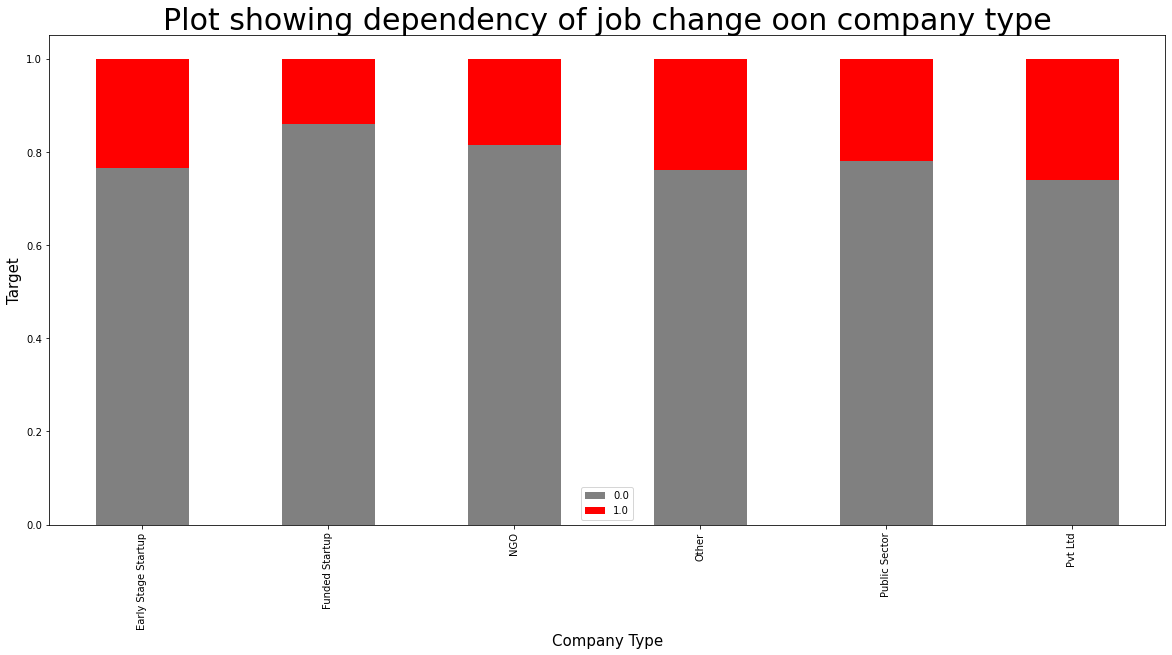

In [181]:
tab = pd.crosstab(df_jc['company_type'], df_jc['target'])
tab.div(tab.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['grey', 'red'])

plt.title('Plot showing dependency of job change oon company type', fontsize = 30)
plt.xlabel('Company Type', fontsize = 15)
plt.ylabel('Target',fontsize=15)
plt.legend()
plt.show()

### Candidates working in Early stage start up,public sector and other are majorly looking for job change.

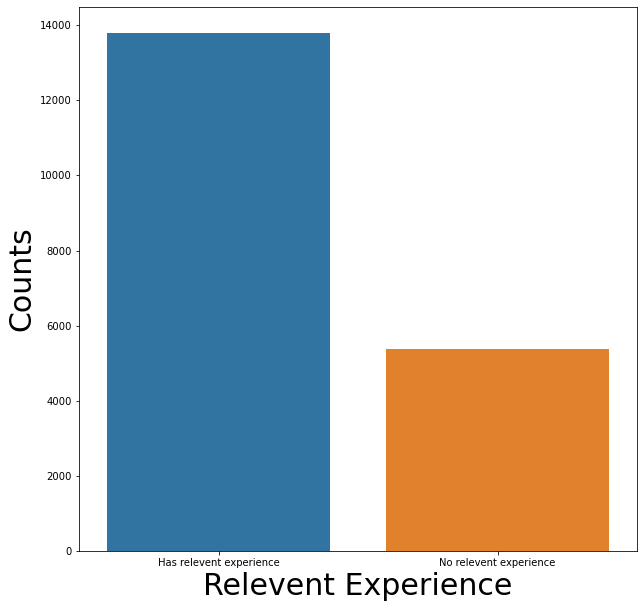

In [182]:
plt.figure(figsize=(10,10))
sns.countplot(df_jc['relevent_experience'])
plt.xlabel('Relevent Experience',fontsize=30)
plt.ylabel('Counts',fontsize=30)
plt.show()

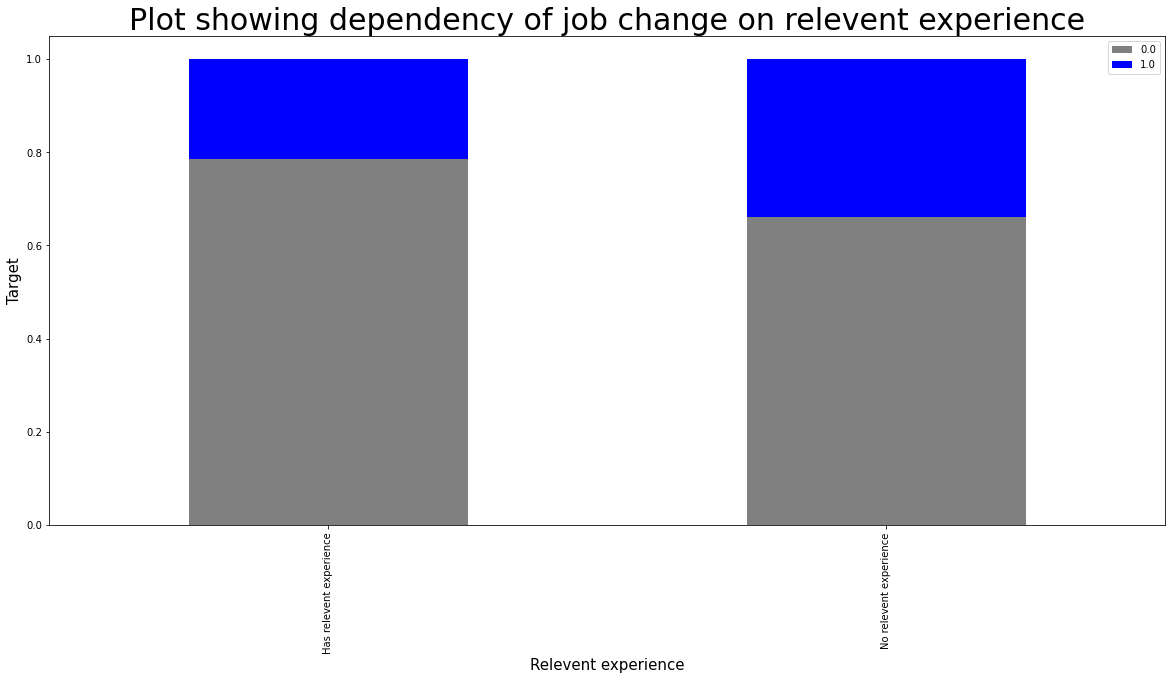

In [183]:
tab = pd.crosstab(df_jc['relevent_experience'], df_jc['target'])
tab.div(tab.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['grey', 'blue'])

plt.title('Plot showing dependency of job change on relevent experience', fontsize = 30)
plt.xlabel('Relevent experience', fontsize = 15)
plt.ylabel('Target',fontsize=15)
plt.legend()
plt.show()

### The candidates who doesn't have relevent experience are opting for job change than the candidates having relevant job experience.

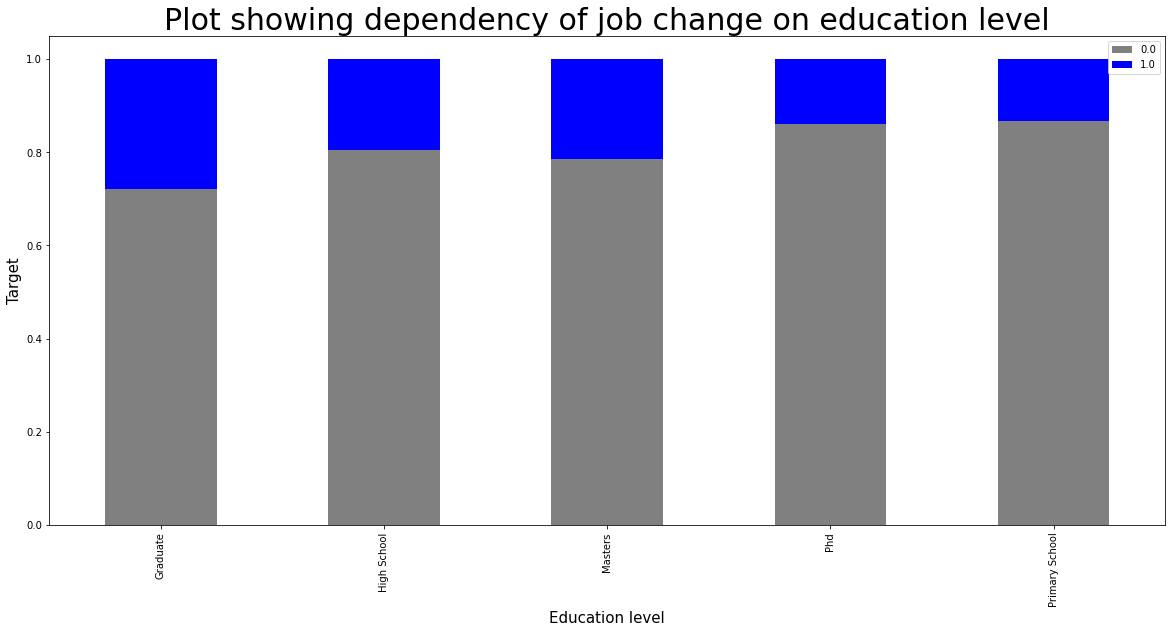

In [184]:
tab = pd.crosstab(df_jc['education_level'], df_jc['target'])
tab.div(tab.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['grey', 'blue'])

plt.title('Plot showing dependency of job change on education level', fontsize = 30)
plt.xlabel('Education level', fontsize = 15)
plt.ylabel('Target',fontsize=15)
plt.legend()
plt.show()

### The above plot explains that graduates are majorly opting for job change than candidates with other educational levels.

In [185]:
df_jc.isnull().sum()

city                      0
gender                    0
relevent_experience       0
enrolled_university     386
education_level           0
major_discipline       2813
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [189]:
tab=df_jc['city'].value_counts(normalize=True)
df_jc['city']=df_jc['city'].map(tab)

In [190]:
tab=df_jc['gender'].value_counts(normalize=True)
df_jc['gender']=df_jc['gender'].map(tab)

In [191]:
tab=df_jc['relevent_experience'].value_counts(normalize=True)
df_jc['relevent_experience']=df_jc['relevent_experience'].map(tab)

In [192]:
tab=df_jc['enrolled_university'].value_counts(normalize=True)
df_jc['enrolled_university']=df_jc['enrolled_university'].map(tab)

In [193]:
tab=df_jc['education_level'].value_counts(normalize=True)
df_jc['education_level']=df_jc['education_level'].map(tab)

In [194]:
tab=df_jc['major_discipline'].value_counts(normalize=True)
df_jc['major_discipline']=df_jc['major_discipline'].map(tab)

In [195]:
tab=df_jc['company_type'].value_counts(normalize=True)
df_jc['company_type']=df_jc['company_type'].map(tab)

In [196]:
tab=df_jc['last_new_job'].value_counts(normalize=True)
df_jc['last_new_job']=df_jc['last_new_job'].map(tab)

In [197]:
from sklearn.impute import KNNImputer
impu=KNNImputer()
df=impu.fit_transform(df_jc)

df_jc1=pd.DataFrame(df,columns=df_jc.columns,index=df_jc.index)

In [198]:
df_jc1.isnull().sum()

city                   0
gender                 0
relevent_experience    0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_type           0
last_new_job           0
training_hours         0
target                 0
dtype: int64

In [199]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
num_sca=ss.fit_transform(df_jc1)
df_sca = pd.DataFrame(df_jc1, columns = df_jc1.columns)

In [200]:
df_sca.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,
8949,0.227320,0.92541,0.719908,0.736043,0.629398,0.886632,0.172105,0.832916,0.441748,36.0,1.0
29725,0.003549,0.92541,0.280092,0.736043,0.629398,0.886632,0.035929,0.832916,0.171730,47.0,0.0
11561,0.141038,0.92541,0.280092,0.200139,0.629398,0.886632,0.074897,0.832916,0.127988,83.0,0.0
33241,0.002819,0.92541,0.280092,0.521681,0.629398,0.020006,0.027340,0.832916,0.127988,52.0,1.0
666,0.020044,0.92541,0.719908,0.736043,0.227633,0.886632,0.172105,0.052250,0.053711,8.0,0.0


In [202]:
df_in=df_sca.drop('target',1)

In [203]:
df_out=df_jc1['target']

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
from sklearn.linear_model import LogisticRegression

In [209]:
xtrain,xtest,ytrain,ytest=train_test_split(df_in,df_out,test_size=0.3,random_state=48,
                                          stratify=df_out)

lm=LogisticRegression()
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.75      0.99      0.86      4315
         1.0       0.54      0.03      0.05      1433

    accuracy                           0.75      5748
   macro avg       0.65      0.51      0.46      5748
weighted avg       0.70      0.75      0.66      5748



In [210]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [211]:
df_out.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [234]:
count_class_0 = 9000
count_class_1 = 9000
pipe = make_pipeline(SMOTE(sampling_strategy={1: count_class_1})
                    ,NearMiss(sampling_strategy={0: count_class_0}))
inp_bal, out_bal = pipe.fit_resample(df_in,df_out)

In [235]:
X_train,X_test,y_train,y_test=train_test_split(inp_bal,out_bal,test_size=0.3,random_state=48)

In [236]:
lm=LogisticRegression()
lm.fit(X_train,y_train)
ypred=lm.predict(X_test)

In [237]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.64      0.70      0.67      2699
         1.0       0.67      0.60      0.63      2701

    accuracy                           0.65      5400
   macro avg       0.65      0.65      0.65      5400
weighted avg       0.65      0.65      0.65      5400



In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,KFold
from xgboost import XGBClassifier

In [239]:
clf1 = LogisticRegression(max_iter=3000)
clf2= DecisionTreeClassifier(random_state=0)
clf3=  RandomForestClassifier(random_state=0)
clf4 = KNeighborsClassifier(n_neighbors=5) 
clf5= GaussianNB()
clf6=XGBClassifier(random_state=0)

In [241]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6],['LR','DT','RF','KNN','GNB','XGB']):
    score = cross_val_score(i,inp_bal,out_bal, cv=kf, scoring='f1')
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.6334333498601481 0.008403997008001098
DT 0.7244260505790266 0.010869126421708734
RF 0.7702984111166896 0.00331017689545507
KNN 0.6593400907460728 0.008786160265036537
GNB 0.5659792608356565 0.008640312977601912
[16:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used 

In [242]:
from sklearn.ensemble import VotingClassifier
estimator=[('DT',DecisionTreeClassifier()),('rf',RandomForestClassifier()),
          ('xb',XGBClassifier())]

In [243]:
vot1=VotingClassifier(estimators=estimator, voting='hard')
vot2=VotingClassifier(estimators=estimator, voting='soft')

In [246]:
score_vot1 = cross_val_score(vot1,inp_bal,out_bal, cv=kf, scoring='f1')
score_vot2 = cross_val_score(vot2, inp_bal, out_bal, cv=kf, scoring='f1')
print('vot1',np.mean(score_vot1),np.std(score_vot1)/np.mean(score_vot1))
print('vot2',np.mean(score_vot2),np.std(score_vot2)/np.mean(score_vot2))

[16:15:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [247]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [248]:
feat_imp=pd.DataFrame()
feat_imp['Feature']=xtrain.columns
feat_imp['Importance']=rf.feature_importances_

In [249]:
feat_imp.sort_values('Importance',ascending=False)

,Feature,Importance
9,training_hours,0.339365
0,city,0.220136
6,experience,0.168417
8,last_new_job,0.075720
4,education_level,0.041858
5,major_discipline,0.041019
3,enrolled_university,0.037580
7,company_type,0.033341
2,relevent_experience,0.021866
1,gender,0.020699


In [250]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[20,40,60,80,100,120,140,160],
        'max_depth':[10,15,20,25,30,40]}

In [251]:
rf_mod1=RandomForestClassifier()
hyp_mod=GridSearchCV(rf_mod1,param_grid=params,scoring='f1')

In [252]:
tun_mod=hyp_mod.fit(xtrain,ytrain)

In [253]:
tun_mod.best_params_

{'max_depth': 10, 'n_estimators': 120}

In [254]:
tun_mod.best_score_

0.3999940886100669

In [255]:
res=pd.DataFrame(tun_mod.cv_results_)
res.shape

(48, 15)

In [256]:
final_mod=RandomForestClassifier(**tun_mod.best_params_)

In [257]:
final_mod.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, n_estimators=120)

In [258]:
ypred1=final_mod.predict(xtest)
ypred1_train=final_mod.predict(xtrain)

In [259]:
confusion_matrix(ytest,ypred1)

array([[4009,  306],
       [ 995,  438]], dtype=int64)

In [260]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      4315
         1.0       0.59      0.31      0.40      1433

    accuracy                           0.77      5748
   macro avg       0.69      0.62      0.63      5748
weighted avg       0.75      0.77      0.75      5748

